In [ ]:
%pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Import Library yang dibutuhkan**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
import umap.umap_ as umap

sns.set_style("darkgrid")
%matplotlib inline

plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

figure_size=(8, 6)

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

fixed_random_state = 42

%config Completer.use_jedi = False

**Load dataset**

In [ ]:
df = pd.read_csv("segmentation_data.csv")

df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Mengganti nama kolom yang berisi spasi, dengan underscore _**

In [ ]:
col_names_cleaned = []

for col_name in df.columns:
    col_names_cleaned.append(col_name.lower().replace(" ", "_"))
    
df.columns = col_names_cleaned

# sanity check
df.head()

,id,sex,marital_status,age,education,income,occupation,settlement_size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


**Mengecek apakah pada dataset ada missing values**

In [ ]:
df.isnull().sum()

id                 0
sex                0
marital_status     0
age                0
education          0
income             0
occupation         0
settlement_size    0
dtype: int64

**Mengecek apakah ada baris duplicat**

1.   List item
2.   List item



In [ ]:
rows_before = len(df)
df.drop_duplicates(inplace=True)
rows_after = len(df)

print(f"Number of duplicate rows: {rows_before - rows_after}")

Number of duplicate rows: 0


**Menghapus kolom id**

In [ ]:
df.drop(columns=["id"], inplace=True)

**Cek apakah atribut ID sudah terhapus dari dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   sex              2000 non-null   int64
 1   marital_status   2000 non-null   int64
 2   age              2000 non-null   int64
 3   education        2000 non-null   int64
 4   income           2000 non-null   int64
 5   occupation       2000 non-null   int64
 6   settlement_size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


**Cek perhitungan dari setiap atribut seperti count, mean, standar deviasi**

In [ ]:
df.describe()

,sex,marital_status,age,education,income,occupation,settlement_size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


**Memasukkan numerical kolom ke dalam variabel num_cols**

In [ ]:
# numerical cols
num_cols = ["age", "income"]

**Memasukkan categorical kolom ke dalam variabel cat_cols setelah itu dilakukan pengubahan dataset ke string**

In [ ]:
# categorical cols
cat_cols = ["sex", "marital_status", "education", "occupation", "settlement_size"]

# convert to string for now as it eases EDA
df[cat_cols] = df[cat_cols].astype(str)

**Visualisasi atribut numerik**

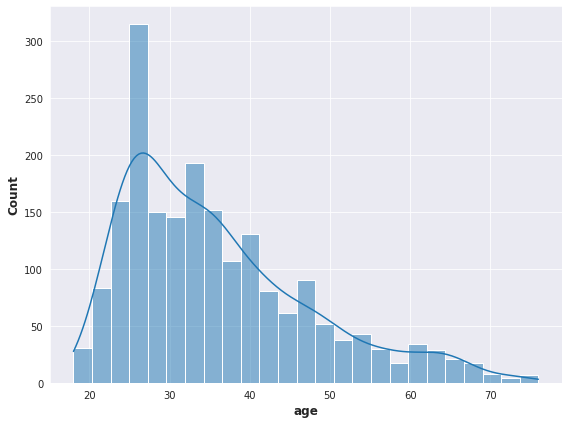

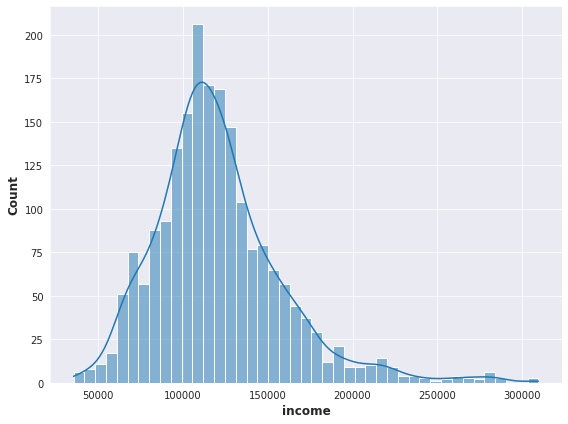

In [ ]:
for num_col in num_cols:
    fig, axs = plt.subplots(figsize=figure_size)
    sns.histplot(df, x=num_col, kde=True)
    plt.show()

**Visualisasi atribut categorical**

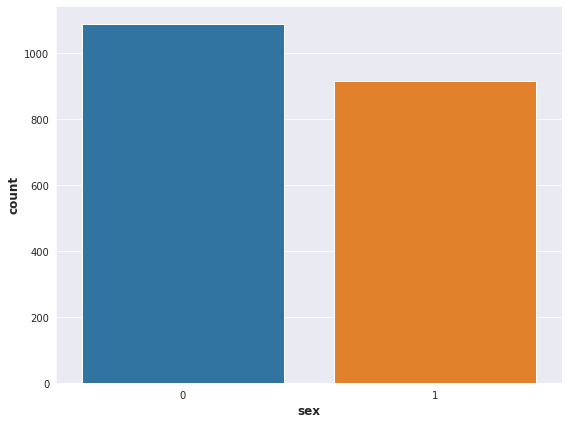

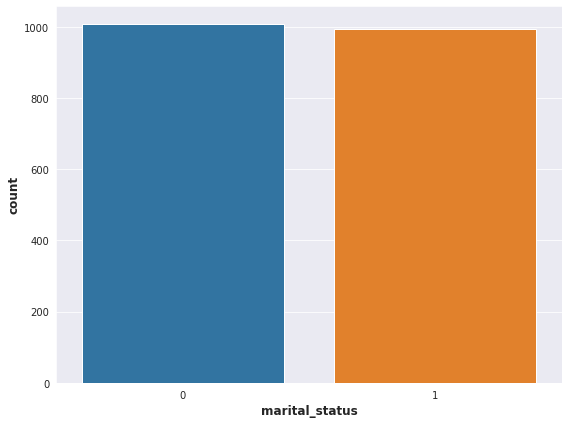

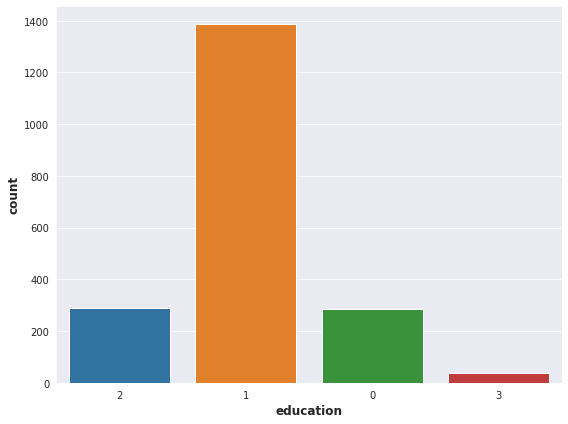

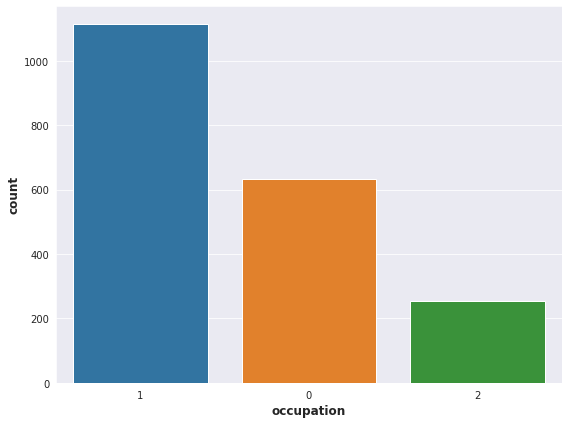

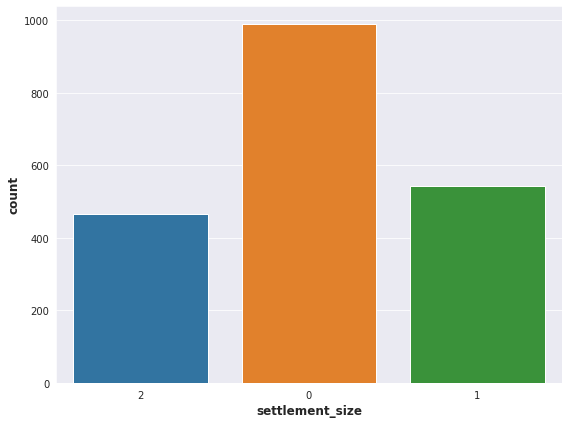

In [ ]:
for col in cat_cols:
    fig, axs = plt.subplots(figsize=figure_size)
    sns.countplot(data=df, x=col)
    plt.show()

**Mengubah kolom categorical dari string menjadi integer atau membuatnya jadi kolom numerical**

In [ ]:
# convert categorical columns back from string to integer

df[cat_cols] = df[cat_cols].astype(int)

**Scalling data yang digunakan untuk membuat setiap atribut atau kolom memiliki rentang nilai yang sama**

In [ ]:
# scaling features

scaler = MinMaxScaler()

col_names = df.columns

X = scaler.fit_transform(df)

X = pd.DataFrame(data=X, columns=col_names)

# sanity check
X.describe()

,sex,marital_status,age,education,income,occupation,settlement_size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,0.308776,0.346000,0.311197,0.405250,0.369500
std,0.498272,0.500113,0.202059,0.199927,0.139321,0.319294,0.406266
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.155172,0.333333,0.226048,0.000000,0.000000
50%,0.000000,0.000000,0.258621,0.333333,0.291434,0.500000,0.500000
75%,1.000000,1.000000,0.413793,0.333333,0.373778,0.500000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Melakukan elbow method untuk mengetahui jumlah cluster yang akan dibuat**

In [ ]:
X1 = X.copy()

In [ ]:
n_clusters = range(2, 12)

inertia = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, random_state=fixed_random_state)
    kmeans.fit_predict(X1)
    inertia.append(kmeans.inertia_)

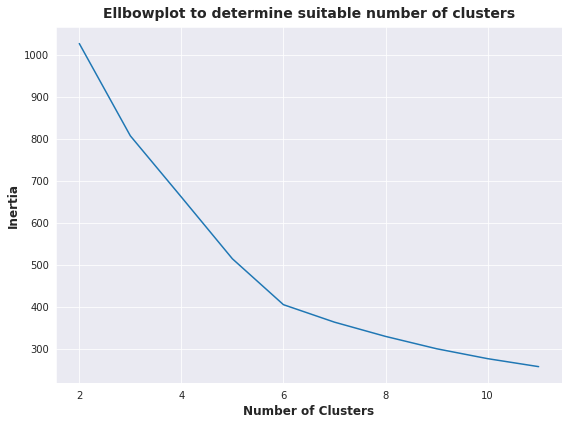

In [ ]:
fig, axs = plt.subplots(figsize=figure_size)
sns.lineplot(x=n_clusters, y=inertia)
axs.set_xlabel("Number of Clusters")
axs.set_ylabel("Inertia")
axs.set_title("Ellbowplot to determine suitable number of clusters")
plt.show()

Dari hasil elbow method, didapatkan patahan terbesar yaitu 6, sehingga akan menggunakan 6 cluster

In [ ]:
X2 = X.copy()

**Mereduce atau split data dataset dari yang sebelumnya 7 atribut ke 2 atribut**

In [ ]:
reducer = umap.UMAP(n_components=2)
embedding = reducer.fit_transform(X2)

In [ ]:
embedding = pd.DataFrame(embedding, columns=["comp_1", "comp_2"])

In [ ]:
kmeans = KMeans(n_clusters=6)
kmeans.fit_predict(embedding)

array([2, 1, 4, ..., 2, 3, 2], dtype=int32)

In [ ]:
embedding["cluster"] = kmeans.labels_

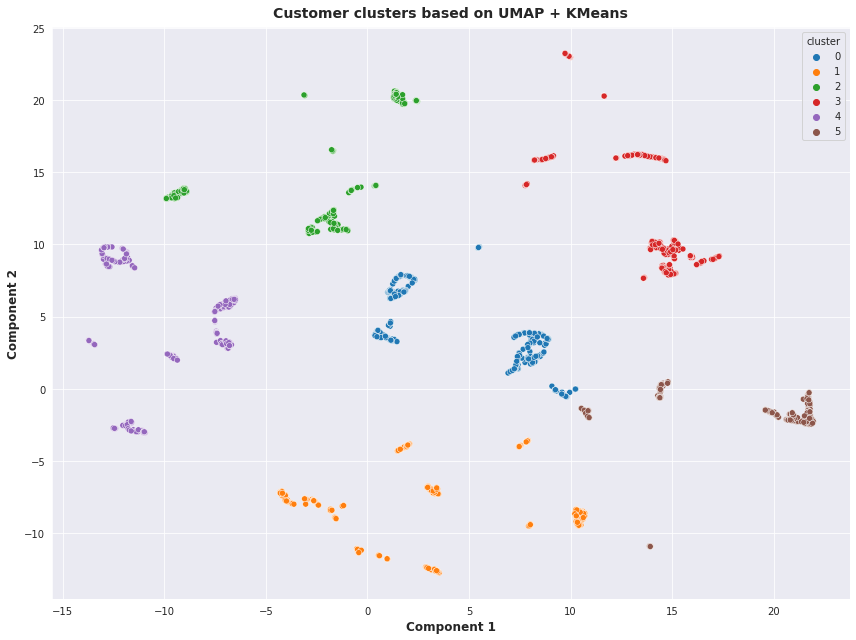

In [ ]:
fig, axs = plt.subplots(figsize=(12,9))
sns.scatterplot(data=embedding, x="comp_1", y="comp_2", hue="cluster", palette="tab10")
axs.set_xlabel("Component 1")
axs.set_ylabel("Component 2")
axs.set_title("Customer clusters based on UMAP + KMeans")
plt.show()

In [ ]:
df["cluster"] = kmeans.labels_

# sanity check
df.head()

,sex,marital_status,age,education,income,occupation,settlement_size,cluster
0,0,0,67,2,124670,1,2,2
1,1,1,22,1,150773,1,2,1
2,0,0,49,1,89210,0,0,4
3,0,0,45,1,171565,1,1,2
4,0,0,53,1,149031,1,1,2


In [ ]:
# Serializing the model
import pickle
pickle.dump(KMeans, open('model.pkl', 'wb'))